In [148]:
using Plots; gr()
using Reproduce
using FileIO
using Statistics
using ProgressMeter
using JLD2
data_home = "../OneDTMazeQ_SR_Tilings"


"../OneDTMazeQ_SR_Tilings"

In [149]:
include("./plot_utils.jl")
GPU = GeneralPlotUtils

Main.GeneralPlotUtils

In [150]:
experiment_folders = [data_home]

1-element Array{String,1}:
 "../OneDTMazeQ_SR_Tilings"

In [151]:
data_key = :oned_tmaze_start_error

:oned_tmaze_start_error

In [152]:
ic = ItemCollection(joinpath(experiment_folders[1], "data"));
# ic = search(ic, Dict("cumulant_schedule" => "DrifterDistractor"))
diff(ic)

Dict{String,Array} with 4 entries:
  "demon_eta"         => [0.00390625, 0.0078125, 0.015625, 0.03125]
  "demon_num_tilings" => [4, 8]
  "demon_num_tiles"   => [4, 8]
  "seed"              => [1, 2, 3, 4, 5]

In [153]:
# length(search(ic, Dict("demon_learner" => "LSTD")))
length(ic)

80

In [165]:
# algo_divisor_keys = ["demon_update"]
# algo_divisor_keys = ["demon_opt", "demon_update"]
algo_divisor_keys = ["demon_num_tilings", "demon_num_tiles"]
# algo_divisor_keys = ["demon_learner"]
sweep_params = ["demon_eta",]
# sweep_params = ["demon_eta", "demon_beta_v", "demon_beta_m"]

algo_specs_full = GPU.split_algo(ic, algo_divisor_keys)

["demon_num_tilings", "demon_num_tiles"]


4-element Array{Any,1}:
 Dict{Any,Any}("demon_num_tilings" => 4,"demon_num_tiles" => 4)
 Dict{Any,Any}("demon_num_tilings" => 4,"demon_num_tiles" => 8)
 Dict{Any,Any}("demon_num_tilings" => 8,"demon_num_tiles" => 4)
 Dict{Any,Any}("demon_num_tilings" => 8,"demon_num_tiles" => 8)

In [166]:
all_algos_ics = [search(ic,algo_spec) for algo_spec in algo_specs_full]
# all_algos_ics = [search(ic,algo_specs_full)]
length.(all_algos_ics)


4-element Array{Int64,1}:
 20
 20
 20
 20

In [169]:
valid_algos_ind = findall(a -> length(a) != 0, all_algos_ics)

algo_specs = algo_specs_full[valid_algos_ind]
algo_ics = all_algos_ics[valid_algos_ind]

4-element Array{ItemCollection,1}:
 ItemCollection(Reproduce.Item[Reproduce.Item("../OneDTMazeQ_SR_Tilings/data/RP_0_0x28350f216c88ca35", Dict{String,Any}("num_tilings" => 16,"logger_keys" => ["ONEDTMAZEERROR"],"steps" => 5000,"behaviour_learner" => "Q","exploration_param" => 0.0,"exploration_strategy" => "epsilon_greedy","use_external_reward" => true,"demon_eta" => 0.015625,"horde_type" => "regular","drifter" => [0.1, 1.0]…), ["logger_keys", "steps", "behaviour_learner", "exploration_param", "exploration_strategy", "use_external_reward", "demon_eta", "horde_type", "drifter", "demon_lambda"  …  "demon_beta_m", "demon_opt", "constant_target", "behaviour_alpha_init", "seed", "cumulant", "demon_discounts", "demon_policy_type", "intrinsic_reward", "num_tilings"]), Reproduce.Item("../OneDTMazeQ_SR_Tilings/data/RP_0_0x2c8e8c09bd7de4cd", Dict{String,Any}("num_tilings" => 16,"logger_keys" => ["ONEDTMAZEERROR"],"steps" => 5000,"behaviour_learner" => "Q","exploration_param" => 0.0,"exploration_s

In [170]:
best_per_algo_ics = [GPU.get_best(algo_ic,sweep_params, data_key) for algo_ic in algo_ics]

["demon_eta"]
[0.06958808251110427, 0.04854083399136363, 0.03711877504240945, 0.040800787027529706]
["demon_eta"]
[0.07516611776044954, 0.05237225354719455, 0.03988558478220364, 0.042327160137673875]
["demon_eta"]
[0.06208018127851336, 0.044704939441294715, 0.03659575217171167, 0.04571035397228939]
["demon_eta"]
[0.06486837408758998, 0.046641849282459166, 0.0371531815125628, 0.042503058420730544]


4-element Array{ItemCollection,1}:
 ItemCollection(Reproduce.Item[Reproduce.Item("../OneDTMazeQ_SR_Tilings/data/RP_0_0x28350f216c88ca35", Dict{String,Any}("num_tilings" => 16,"logger_keys" => ["ONEDTMAZEERROR"],"steps" => 5000,"behaviour_learner" => "Q","exploration_param" => 0.0,"exploration_strategy" => "epsilon_greedy","use_external_reward" => true,"demon_eta" => 0.015625,"horde_type" => "regular","drifter" => [0.1, 1.0]…), ["logger_keys", "steps", "behaviour_learner", "exploration_param", "exploration_strategy", "use_external_reward", "demon_eta", "horde_type", "drifter", "demon_lambda"  …  "demon_beta_m", "demon_opt", "constant_target", "behaviour_alpha_init", "seed", "cumulant", "demon_discounts", "demon_policy_type", "intrinsic_reward", "num_tilings"]), Reproduce.Item("../OneDTMazeQ_SR_Tilings/data/RP_0_0x2c8e8c09bd7de4cd", Dict{String,Any}("num_tilings" => 16,"logger_keys" => ["ONEDTMAZEERROR"],"steps" => 5000,"behaviour_learner" => "Q","exploration_param" => 0.0,"exploration_s

In [171]:
length.(best_per_algo_ics)

4-element Array{Int64,1}:
 5
 5
 5
 5

In [172]:
data = [GPU.smooth(GPU.get_stats(GPU.load_results(ic,data_key))[1],5) for ic in best_per_algo_ics]
std = [GPU.smooth(GPU.get_stats(GPU.load_results(ic,data_key))[2],5) for ic in best_per_algo_ics]


4-element Array{Array{Float64,1},1}:
 [0.004677788267185033, 0.007167729550541733, 0.008825333589321452, 0.010114171368070928, 0.010755570936788153, 0.01271928382384189, 0.013445256639634456, 0.013537083679134577, 0.013379301017273951, 0.012911603878883742  …  0.0029859225204065367, 0.0032343446584642407, 0.0032430300243787838, 0.0033866861960167227, 0.0036149865665354706, 0.003659935639709655, 0.0037308286856040074, 0.004023461412499485, 0.003977130857290399, 0.0038366874949339416]
 [0.0041007558509295605, 0.006081064511766498, 0.0073511871991178085, 0.008488098414811058, 0.009080782977225204, 0.010959947943827951, 0.011836038515717429, 0.012312468795855003, 0.012436160837166286, 0.012417735074921912  …  0.0028811142917035504, 0.0031599088296161092, 0.0032724592063003042, 0.003343921875152441, 0.0035275594767345516, 0.003563908847979551, 0.003668478646658305, 0.003967455038553639, 0.003985744001426784, 0.003822065245205468]
 [0.008421819221609677, 0.012003011947991811, 0.0137342033838

In [173]:
algo_specs
[GPU.print_params(algo, algo_divisor_keys, sweep_params) for algo in best_per_algo_ics]

For IC: 
demon_num_tilings  4
demon_num_tiles  4
demon_eta  0.015625

For IC: 
demon_num_tilings  4
demon_num_tiles  8
demon_eta  0.015625

For IC: 
demon_num_tilings  8
demon_num_tiles  4
demon_eta  0.015625

For IC: 
demon_num_tilings  8
demon_num_tiles  8
demon_eta  0.015625



4-element Array{Nothing,1}:
 nothing
 nothing
 nothing
 nothing

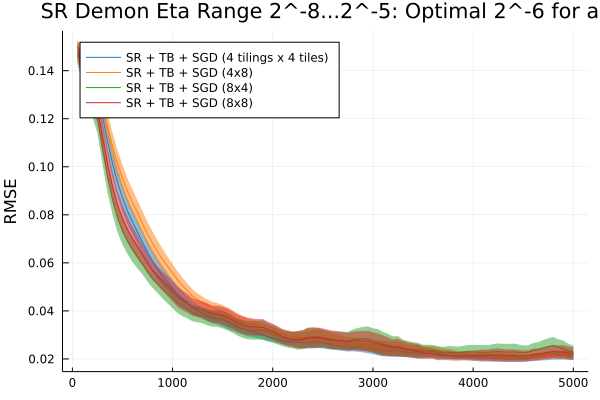

In [177]:
# labels = ["LSTD" "Q + ESARSA + Auto" "Q + ESARSA + SGD"]
# labels = ["LSTD" "Q + TB + ADAM" "Q + ESARSA + Auto" "Q + Auto + TB" "Q + ESARSA + SGD" "Q + TB + SGD" "SR + TB + Auto" "SR + TB + SGD"]
# labels = ["Q + ESARSA + ADAM" "Q + TB + ADAM" "Q + ESARSA + AUTO" "Q + TB + AUTO" "Q + ESARSA + SGD" "Q + TB + SGD"]
# labels = ["Q + ESARSA + ADAM" "Q + TB + ADAM"]
labels = ["SR + TB + SGD (4 tilings x 4 tiles)" "SR + TB + SGD (4 tilings x 8 tiles)" "SR + TB + SGD (8 tilings x 4 tiles)" "SR + TB + SGD (8 tilings x 8 tiles)"]
ylabel = "RMSE"
title = "SR Demon Eta Range 2^-8...2^-5: Optimal 2^-6 for all"
step_increment=50
num_samples = length(data[1])
xticks=collect(step_increment:step_increment:num_samples*step_increment)
(:tab10)
plot(xticks, data, ylabel=ylabel, palette=:tab10, label= labels, ribbon = std/sqrt(5), legend=:topleft, title=title)

In [176]:
savefig("./plots/onedtmaze/SR_constant_different_tilings.png")

In [64]:
#Replicating plot from Experiment 1.
inds_to_replicate = [3,4,5,6]
label_subset = labels[:,inds_to_replicate]
data_subset = data[inds_to_replicate]

label_subset

1×4 Array{String,2}:
 "Q + ESARSA + AUTO"  "Q + TB + AUTO"  "Q + ESARSA + SGD"  "Q + TB + SGD"

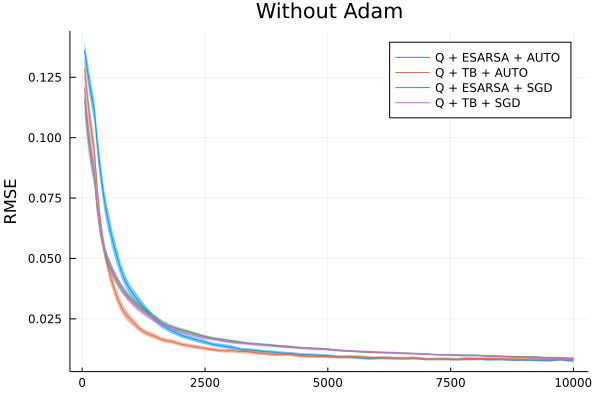

In [67]:
title = "Without Adam"
ylabel = "RMSE"
step_increment=50
num_samples = length(data[1])
xticks=collect(step_increment:step_increment:num_samples*step_increment)
plot(xticks, data_subset,ylabel= ylabel, label= label_subset, ribbon = std[inds_to_replicate]/sqrt(20), legend=:topright, title=title)

In [68]:
savefig("./plots/onedtmaze/constant_without_adam.png")